# 1.Introduction

 Predicting price
 For furthermore information go and see README.md

# 2. Importing important libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# New Starting 

In [142]:
df = pd.read_csv("dataset/car-data-new.csv")

In [143]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [144]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [145]:
df['Car_Name'].nunique()

98

<Axes: >

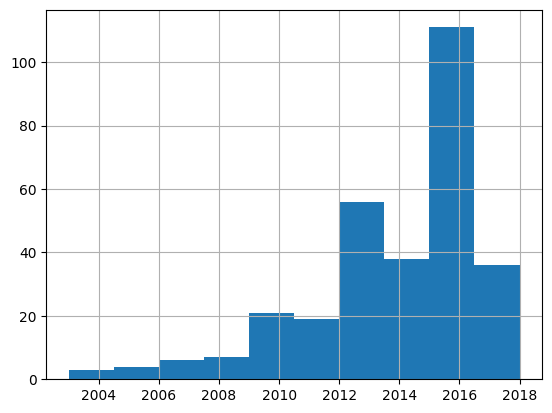

In [146]:
df['Year'].hist()

In [147]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [148]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [149]:
X = df[['Car_Name', 'Year', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

y = df['Selling_Price']

In [150]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



Encode categorical features

In [151]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

In [152]:
for col in df.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[[col]])
    X_test[col] = encoder.transform(X_test[[col]])
    

Train Model

In [153]:
tree_regressor = DecisionTreeRegressor()


In [154]:
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

prediction

In [155]:
prediction = tree_regressor.predict(X_test)


Check the quality of model

In [156]:
mean_absolute_error(y_test,prediction)


2.2040983606557374

make feature importance based on the coefficients of the decision tree

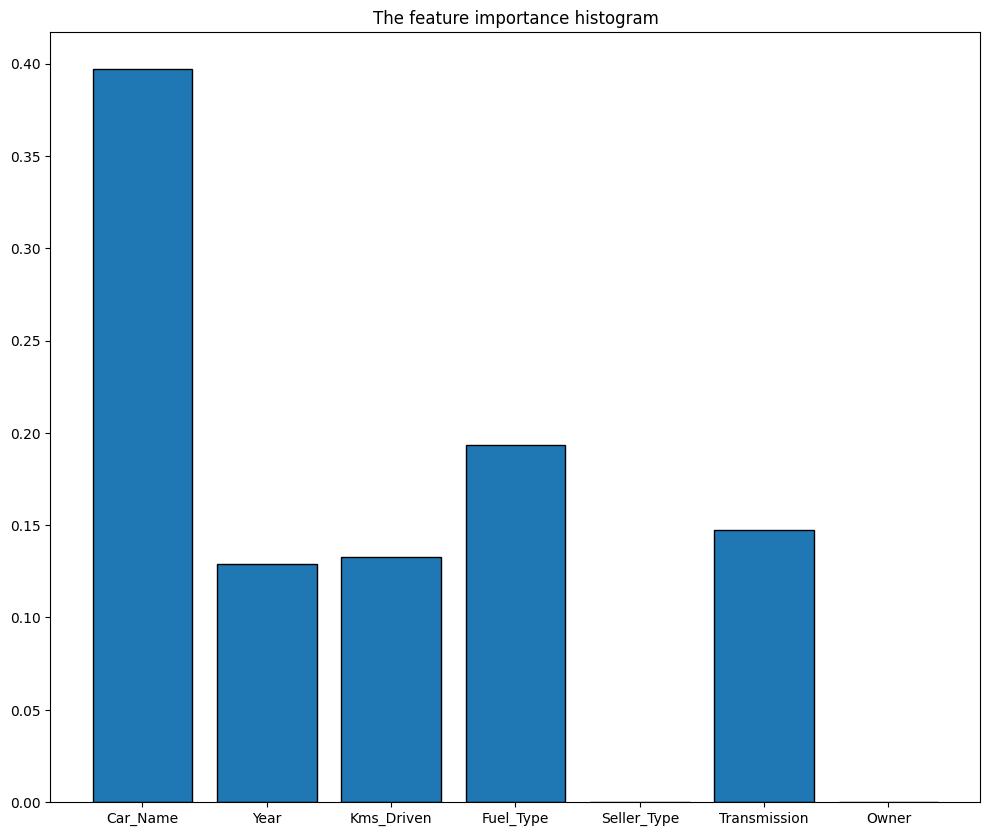

In [157]:
plt.figure(figsize =(12,10))

plt.bar(tree_regressor.feature_names_in_, tree_regressor.feature_importances_,edgecolor = 'black')

plt.title('The feature importance histogram')
plt.savefig('The feature importance histogram fig')

plt.show()

In [158]:
import seaborn as sns


/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


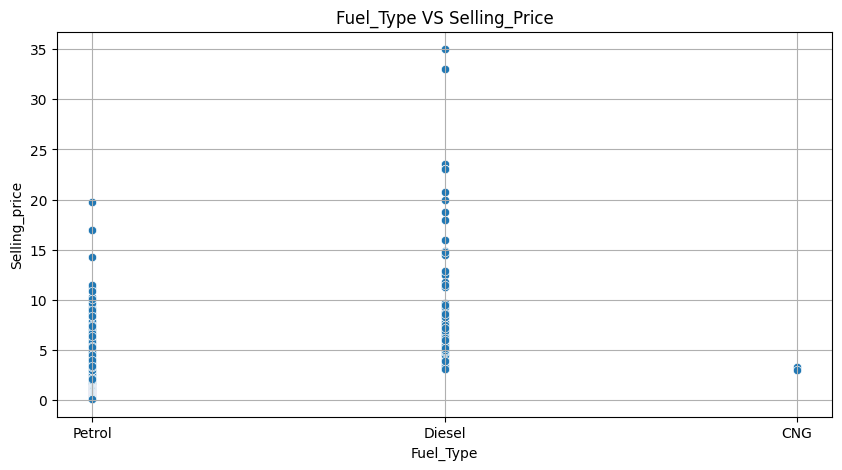

In [159]:

plt.figure(figsize=(10,5))

sns.scatterplot(x="Fuel_Type",y="Selling_Price",data=df)

plt.title('Fuel_Type VS Selling_Price',)
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_price')
plt.grid()
plt.show()



/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


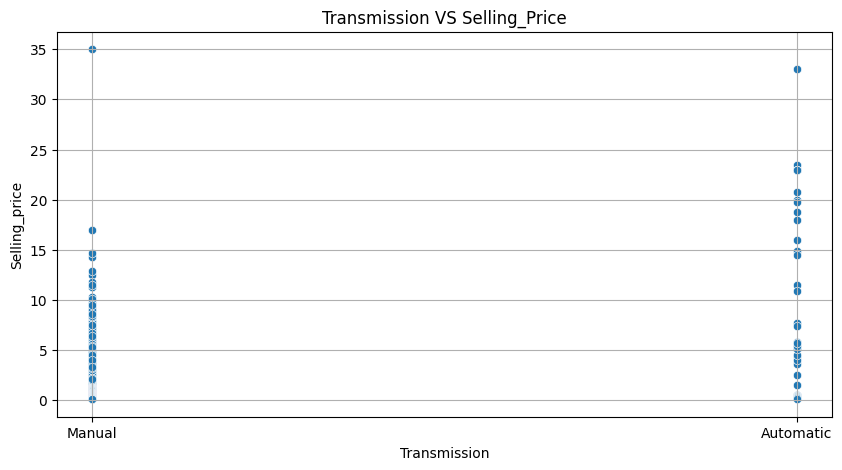

In [160]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="Transmission",y="Selling_Price",data=df)

plt.title('Transmission VS Selling_Price',)
plt.xlabel('Transmission')
plt.ylabel('Selling_price')
plt.grid()
plt.show()

/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


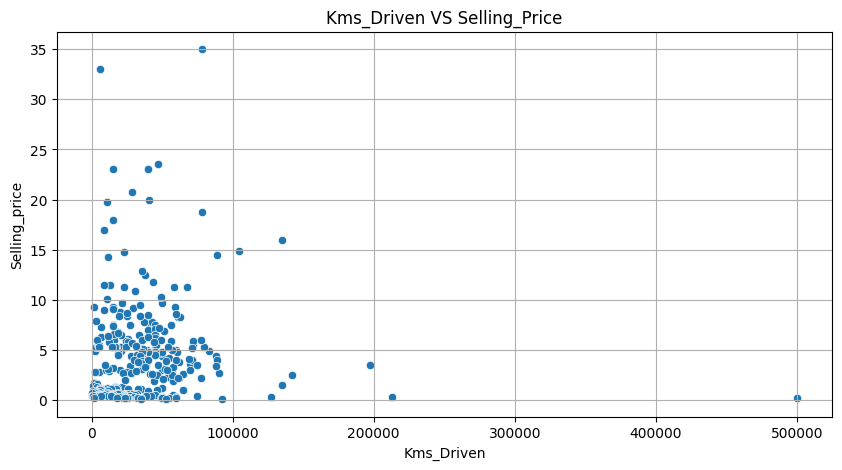

In [161]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="Kms_Driven",y="Selling_Price",data=df)

plt.title('Kms_Driven VS Selling_Price',)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_price')
plt.grid()
plt.show()

Model Creation/Evaluation

In [162]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [163]:
CV =[]
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model 
    model.fit(X_train,y_train)

    #R2 score of train set 
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))

    
    #R2 score of test set 
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_train.append(round(R2_test_model,2))

    # R2 men of train set using cross validation 
    cross_val = cross_val_score(model,X_train,y_train,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # printing results 

    print("Train R2-Score :",round(R2_train_model,2))
    print("Test R2-Score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean",round(cv_mean,2))

    # Plotting graphs 
    # Residual plot of train data 
    fig,ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax=ax[0])
    ax[0].set_xlabel('y-train - y_pred_train')

    # y-Test vs y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    ax[1].scatter(x=y_test,y=y_pred_test)

    plt.show()





/var/folders/bx/p84kl_zj12114r6n7d44fh540000gn/T/ipykernel_89523/3271531189.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax=ax[0])
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

Train R2-Score : 0.58
Test R2-Score : 0.36
Train CV scores : [0.64647759 0.63266559 0.43509331 0.57955556 0.20954953]
Train CV mean 0.5


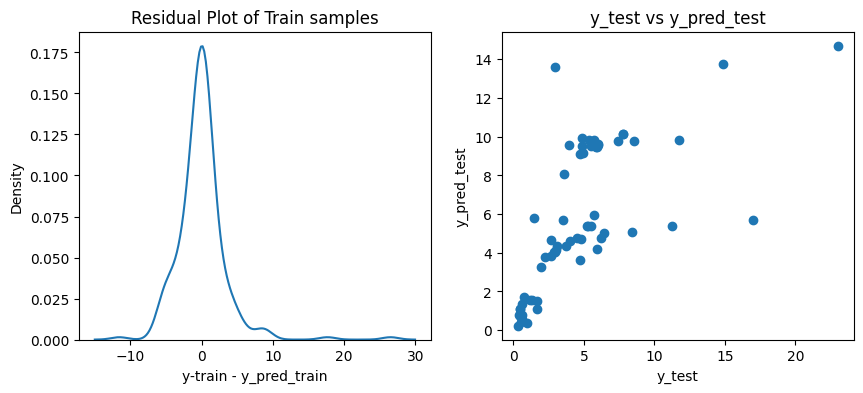

In [164]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,'Linear_regressor.pkl')

Train R2-Score : 0.55
Test R2-Score : 0.43
Train CV scores : [0.65227339 0.66047729 0.40196257 0.65268126 0.2310396 ]
Train CV mean 0.52


/var/folders/bx/p84kl_zj12114r6n7d44fh540000gn/T/ipykernel_89523/3271531189.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax=ax[0])
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

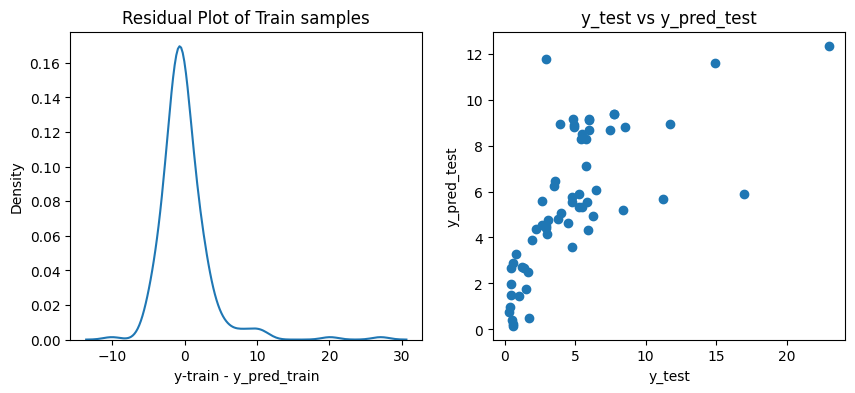

In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# create Ridge model object
rg = Ridge()

# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter

rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-Score : 0.58
Test R2-Score : 0.36
Train CV scores : [0.64647759 0.63266559 0.43509331 0.57955556 0.20954953]
Train CV mean 0.5


/var/folders/bx/p84kl_zj12114r6n7d44fh540000gn/T/ipykernel_89523/3271531189.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax=ax[0])
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjayprajapati/Documents/env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

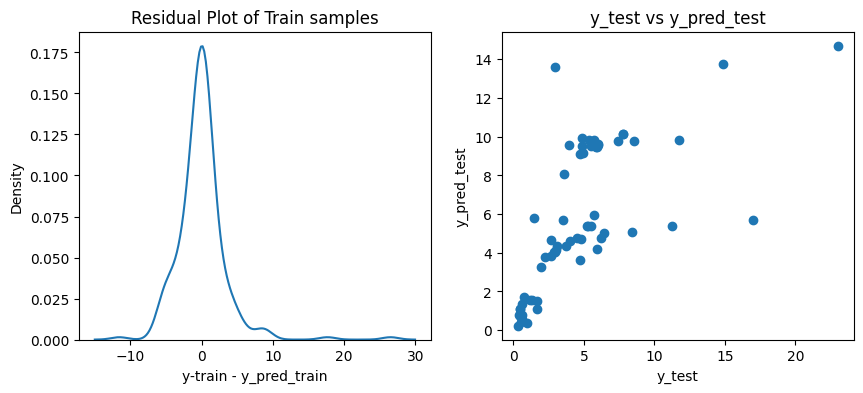

In [166]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")